# Homework Assignment - Lesson 2: Data Cleaning - Handling Missing Values and Outliers

**Student Name:** [YOUR NAME HERE]  
**Date:** [TODAY'S DATE]  
**Course:** Data Management  

---

## Instructions

Complete all the tasks below by adding your R code in the code cells and your written responses in markdown cells. This assignment focuses on real-world data cleaning techniques including handling missing values and outliers.

**💡 Key Learning Goals:**
- Identify and handle missing values using multiple strategies
- Detect and treat outliers using statistical methods
- Make informed decisions about data quality trade-offs
- Document your data cleaning process and reasoning

**📋 SUBMISSION**: When you're done, see [GITHUB_CLASSROOM_SUBMISSION.md](../../GITHUB_CLASSROOM_SUBMISSION.md) for complete submission instructions.

---

### Part 1: Data Import and Initial Assessment

In this section, you'll import a "messy" dataset that contains missing values and outliers, simulating real-world data quality challenges.

#### 1.1 Environment Setup

Load the required packages for data cleaning and analysis.

In [1]:
# Load required packages for data cleaning
library(tidyverse) # For data manipulation and visualization

# Check current working directory
getwd()

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.1.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


[1] "/workspaces/Data-Management-Assignment-1-Intro-to-R/assignment/Homework"

#### 1.2 Import Messy Dataset

Import the provided messy sales dataset that contains real-world data quality issues including missing values, outliers, and inconsistencies.

In [4]:
# Import the messy sales dataset
messy_sales <- readr::read_csv(file.path("..","..","data","messy_sales_data.csv"))

print("Messy sales dataset imported successfully!")
print(paste("Dataset contains", nrow(messy_sales), "rows and", ncol(messy_sales), "columns"))
cat("Column names:", paste(names(messy_sales), collapse = ", "), "\n")

Rows: 200 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): Customer_Name, Product_Category
dbl  (3): TransactionID, Sales_Amount, Quantity
date (1): Purchase_Date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "Messy sales dataset imported successfully!"
[1] "Dataset contains 200 rows and 6 columns"
Column names: TransactionID, Customer_Name, Product_Category, Sales_Amount, Purchase_Date, Quantity 


#### 1.3 Initial Data Assessment

Perform a comprehensive inspection of the messy dataset to understand its structure and identify data quality issues.

In [5]:
# Inspect the messy dataset
print("=== DATASET OVERVIEW ===")
head(messy_sales, 10) # First 10 rows

[1] "=== DATASET OVERVIEW ==="


TransactionID,Customer_Name,Product_Category,Sales_Amount,Purchase_Date,Quantity
<dbl>,<chr>,<chr>,<dbl>,<date>,<dbl>
1,NA,Home,362.3175,NA,2
2,Alice Brown,Clothing,573.0791,2023-10-21,3
3,Jane Doe,Electronics,487.6874,2023-12-28,-1
4,Jane Doe,Electronics,5000.0000,2023-06-16,7
5,John Smith,Books,344.1746,2023-05-05,100
6,John Smith,Books,434.9527,2023-11-28,4
7,Jane Doe,Home,489.0863,2023-08-17,0
8,Jane Doe,Electronics,536.9202,2023-05-17,7
9,Jane Doe,Clothing,793.3933,2023-08-13,3


# Structure and summary of the data
print("=== DATA STRUCTURE ===")
str(messy_sales)

print("=== SUMMARY STATISTICS ===")
summary(messy_sales)

**Data Quality Assessment:**

Based on the imported messy_sales dataset, document all the data quality issues you observe:

1. **Missing Values:** [Look for NA values - which columns have missing data?]

2. **Potential Outliers:** [Check Sales_Amount and Quantity - do any values seem extreme?]

3. **Data Inconsistencies:** [Look at Product_Category - are there inconsistent naming conventions?]

4. **Data Types:** [Are Purchase_Date and Sales_Amount using appropriate data types?]

5. **Invalid Values:** [Are there any logically impossible values like negative quantities?]

**YOUR OBSERVATIONS:**

1. Missing values: Customer_Name and Purchase_Date contain NAs.
2. Outliers: Sales_Amount has extreme values (for instance, 5000), and Quantity has unrealistic values like 100.
3. Inconsistencies: Product_Category has duplicates caused by inconsistent casing (e.g., Electronics vs. electronics).
4. Data types: Sales_Amount and Quantity are numeric, and Purchase_Date is in date format, which is correct.
5. Invalid values: Negative and zero quantities appear, which don’t make sense for sales data.

---

### Part 2: Missing Value Analysis and Treatment

In this section, you'll identify missing values and apply different strategies to handle them.



Complete the following tasks to thoroughly understand the missing value patterns in your dataset.

In [6]:
# TODO: Calculate total missing values in the entire dataset
total_missing <- sum(is.na(messy_sales))

# TODO: Calculate missing values per column
missing_per_column <- colSums(is.na(messy_sales))

# TODO: Identify rows with missing values
incomplete_rows <- messy_sales[!complete.cases(messy_sales), ]

print(paste("Total missing values:", total_missing))
print("Missing values per column:")
print(missing_per_column)
print("Rows with missing values:")

[1] "Total missing values: 52"
[1] "Missing values per column:"
   TransactionID    Customer_Name Product_Category     Sales_Amount 
               0               16                0               22 
   Purchase_Date         Quantity 
              14                0 
[1] "Rows with missing values:"


"#### 2.2 Missing Value Treatment - Option A (Removal)
",

Create a dataset with all missing value rows removed and compare the results.

In [8]:
# TODO: Remove all rows with missing values
sales_removed_na <- na.omit(messy_sales)

# Compare dimensions
print("Original dataset dimensions:")
print(dim(messy_sales))
print("After removing NA rows:")
print(dim(sales_removed_na))
print(paste("Rows lost:", nrow(messy_sales) - nrow(sales_removed_na)))

[1] "Original dataset dimensions:"
[1] 200   6
[1] "After removing NA rows:"
[1] 156   6
[1] "Rows lost: 44"


#### 2.3 Missing Value Treatment - Option B (Imputation)


Apply appropriate imputation strategies for different types of variables.

In [9]:
## Create a copy for imputation
sales_imputed <- messy_sales


In [11]:
### TODO: Create a mode function for categorical variables
get_mode <- function(v) {
uniq_vals <- unique(v)
  mode_idx <- which.max(tabulate(match(v, uniq_vals)))
  uniq_vals[mode_idx]
}

In [12]:
### TODO: Impute Customer_Name with mode (for categorical missing values)
sales_imputed$Customer_Name <- ifelse(
  is.na(sales_imputed$Customer_Name),
  get_mode(sales_imputed$Customer_Name),
  sales_imputed$Customer_Name
)

In [13]:
### To practice median imputation, try it on Quantity column
### TODO: Impute Quantity with median (alternative approach for numeric data)
sales_imputed$Quantity <- ifelse(
  is.na(sales_imputed$Quantity),
  median(sales_imputed$Quantity, na.rm = TRUE),
  sales_imputed$Quantity
)

In [14]:
### Verify imputation success
print("Missing values after imputation:")
print(colSums(is.na(sales_imputed)))

[1] "Missing values after imputation:"
   TransactionID    Customer_Name Product_Category     Sales_Amount 
               0                0                0               22 
   Purchase_Date         Quantity 
              14                0 


#### 2.4 Compare Missing Value Strategies Analyze the impact of different missing value treatment approaches.

In [15]:
# Compare summary statistics
print("=== ORIGINAL DATA ===")
summary(messy_sales$Sales_Amount)

[1] "=== ORIGINAL DATA ==="


    Min.  1st Qu.   Median     Mean  3rd Qu.     Max.     NA's 
  -100.0    362.6    531.3   1614.9    694.5 100000.0       22 

In [16]:
print("=== AFTER REMOVING NAs ===")
summary(sales_removed_na$Sales_Amount)

[1] "=== AFTER REMOVING NAs ==="


     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
   -56.72    361.79    537.48   1729.00    715.74 100000.00 

In [17]:
print("=== AFTER IMPUTATION ===")
summary(sales_imputed$Sales_Amount)

[1] "=== AFTER IMPUTATION ==="


    Min.  1st Qu.   Median     Mean  3rd Qu.     Max.     NA's 
  -100.0    362.6    531.3   1614.9    694.5 100000.0       22 


**Analysis Questions:**

1. **Which approach would you recommend for this dataset and why?**

I’d go with imputation. Dropping NAs deletes 44/200 rows (~22%) and it noticeably shifts Sales_Amount (mean goes from ~1615 to ~1729 after removal). That’s a big chunk of data and it changes the story. With imputation we keep the full sample. If needed, I’d also median-impute Sales_Amount (ideally within Product_Category) to avoid losing rows later.

2. **What are the trade-offs between removal and imputation?**

Removal: super easy and uses only real values, but you lose data (22% here), reduce power, and can introduce bias if the missingness isn’t random.

Imputation: keeps all rows and is better for models that need complete cases, but you’re filling in estimates—variance can be understated and results depend on the method. Best practice: use median/mode (or group-wise medians), flag imputed values, and sanity-check results against a removal run.

---

"### Part 3: Outlier Detection and Treatment
",

Using your imputed dataset, identify and handle outliers in the Sales_Amount variable.

"#### 3.1 Outlier Detection Using IQR Method
",

Apply the interquartile range method to identify outliers in Sales_Amount.

In [19]:
### TODO: Calculate quartiles and IQR for Sales_Amount
Q1_sales <- quantile(sales_imputed$Sales_Amount, 0.25, na.rm = TRUE)
Q3_sales <- quantile(sales_imputed$Sales_Amount, 0.75, na.rm = TRUE)
IQR_sales <- IQR(sales_imputed$Sales_Amount, na.rm = TRUE)

In [20]:
### TODO: Calculate outlier thresholds
upper_threshold <- Q3_sales + 1.5 * IQR_sales
lower_threshold <- Q1_sales - 1.5 * IQR_sales

In [21]:
### TODO: Identify outliers
outliers <- sales_imputed[
  sales_imputed$Sales_Amount < lower_threshold | sales_imputed$Sales_Amount > upper_threshold, 
]

print(paste("Q1:", Q1_sales))
print(paste("Q3:", Q3_sales))
print(paste("IQR:", IQR_sales))
print(paste("Lower threshold:", lower_threshold))
print(paste("Upper threshold:", upper_threshold))
print(paste("Number of outliers found:", nrow(outliers)))
print("Outlier rows:")
print(outliers)

[1] "Q1: 362.578164415014"
[1] "Q3: 694.479236061358"
[1] "IQR: 331.901071646344"
[1] "Lower threshold: -135.273443054502"
[1] "Upper threshold: 1192.33084353087"
[1] "Number of outliers found: 28"
[1] "Outlier rows:"
# A tibble: 28 × 6
   TransactionID Customer_Name Product_Category Sales_Amount Purchase_Date
           <dbl> <chr>         <chr>                   <dbl> <date>       
 1             4 Jane Doe      Electronics              5000 2023-06-16   
 2            NA NA            NA                         NA NA           
 3            NA NA            NA                         NA NA           
 4            NA NA            NA                         NA NA           
 5            NA NA            NA                         NA NA           
 6            46 John Smith    Books                    8000 NA           
 7            NA NA            NA                         NA NA           
 8            NA NA            NA                         NA NA           
 9           

### 3.2 Outlier Visualization

Create a boxplot to visualize the outliers in Sales_Amount.

Warning message:
“Removed 22 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


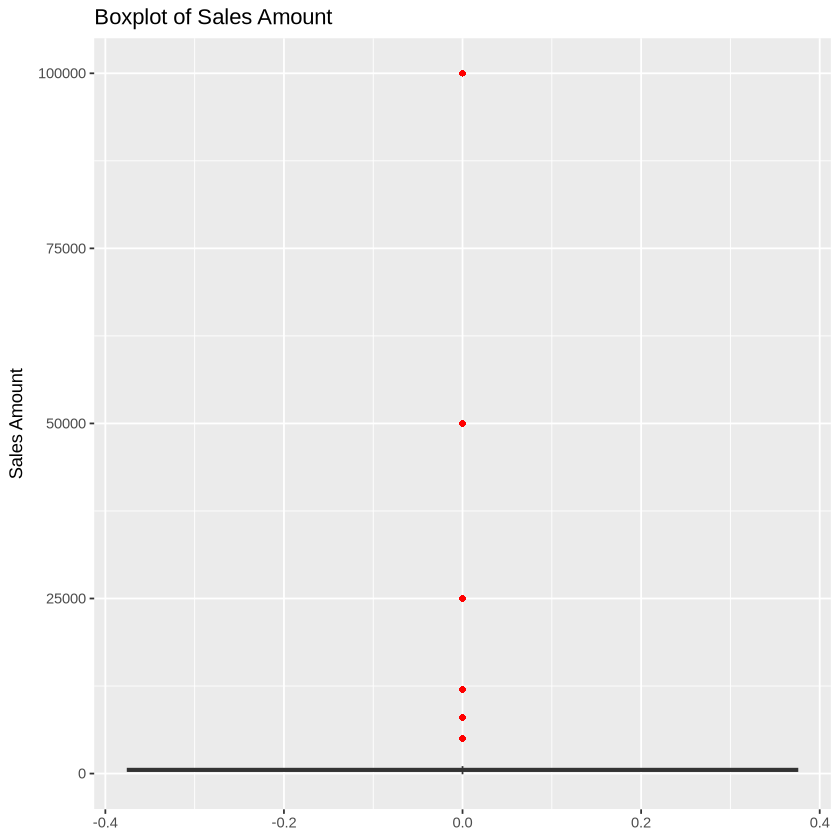

In [22]:
### TODO: Create a boxplot for Sales_Amount
library(ggplot2)
# Use ggplot2 to create a boxplot showing outliers
boxplot_sales <- ggplot(sales_imputed, aes(y = Sales_Amount)) +
  geom_boxplot(outlier.colour = "red", outlier.shape = 16) +
  labs(title = "Boxplot of Sales Amount", y = "Sales Amount")

# Display the plot
print(boxplot_sales)

### 3.3 Outlier Treatment - Option A (Removal)

Remove rows containing outliers and assess the impact.

In [23]:
### TODO: Remove outliers from the imputed dataset
sales_outliers_removed <- sales_imputed[
  sales_imputed$Sales_Amount >= lower_threshold & sales_imputed$Sales_Amount <= upper_threshold, 
]

print(paste("Original rows:", nrow(sales_imputed)))
print(paste("After removing outliers:", nrow(sales_outliers_removed)))
print(paste("Rows removed:", nrow(sales_imputed) - nrow(sales_outliers_removed)))

[1] "Original rows: 200"
[1] "After removing outliers: 194"
[1] "Rows removed: 6"


### 3.4 Outlier Treatment - Option B (Capping)

Apply capping/winsorization to handle outliers while preserving data points.

### 3.2 Outlier Visualization

Create a boxplot to visualize the outliers in Sales_Amount.

Warning message:
“Removed 22 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


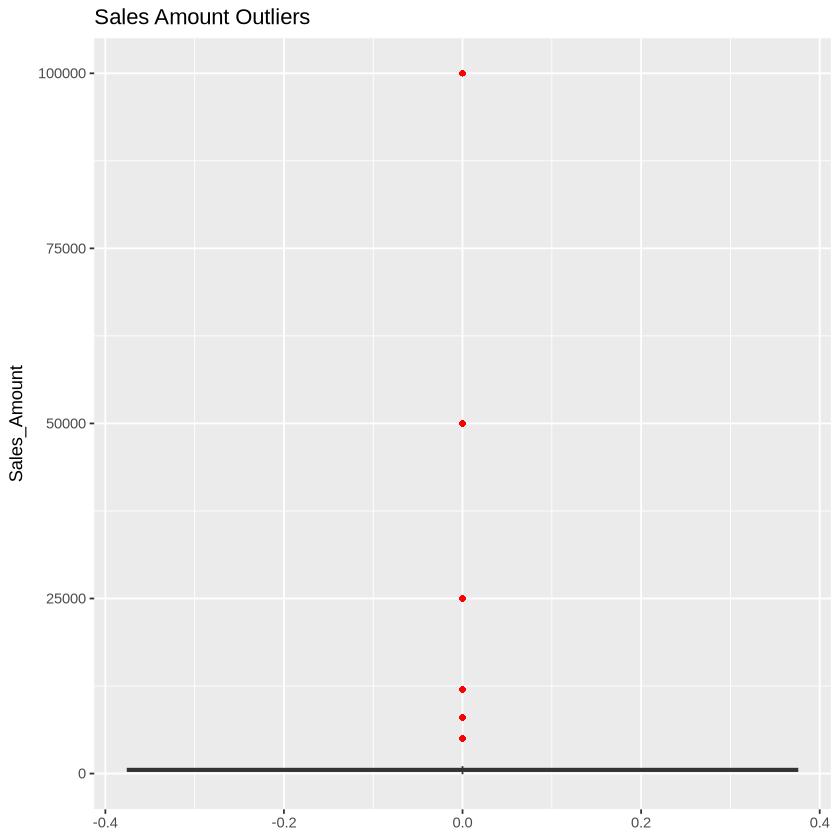

In [24]:
# TODO: Create a boxplot for Sales_Amount
# Use ggplot2 to create a boxplot showing outliers
boxplot_sales <- ggplot(sales_imputed, aes(y = Sales_Amount)) +
  geom_boxplot(outlier.colour = "red", outlier.shape = 16) +
  ggtitle("Sales Amount Outliers")

# Hint: ggplot(sales_imputed, aes(y = Sales_Amount)) + geom_boxplot() + ggtitle("Sales Amount Outliers")

# Display the plot
print(boxplot_sales)

### 3.3 Outlier Treatment - Option A (Removal)

Remove rows containing outliers and assess the impact.

In [25]:
### TODO: Remove outliers from the imputed dataset
sales_outliers_removed <- sales_imputed %>%
  filter(Sales_Amount >= lower_threshold & Sales_Amount <= upper_threshold)
# Hint: Use filter() to keep only rows within the threshold bounds

print(paste("Original rows:", nrow(sales_imputed)))
print(paste("After removing outliers:", nrow(sales_outliers_removed)))
print(paste("Rows removed:", nrow(sales_imputed) - nrow(sales_outliers_removed)))

[1] "Original rows: 200"
[1] "After removing outliers: 172"
[1] "Rows removed: 28"


In [26]:
### TODO: Create a capped version of the dataset
sales_outliers_capped <- sales_imputed

In [27]:
### TODO: Apply capping to Sales_Amount
sales_outliers_capped$Sales_Amount <- ifelse(
  sales_outliers_capped$Sales_Amount < lower_threshold, lower_threshold,
  ifelse(sales_outliers_capped$Sales_Amount > upper_threshold, upper_threshold,
         sales_outliers_capped$Sales_Amount)
)
### Hint: Use ifelse() to replace values above/below thresholds

In [28]:
### Verify capping worked
print("Sales_Amount range after capping:")
print(range(sales_outliers_capped$Sales_Amount, na.rm = TRUE))

[1] "Sales_Amount range after capping:"
[1] -100.000 1192.331


In [29]:
### Check for remaining outliers
remaining_outliers <- sales_outliers_capped %>%
  filter(Sales_Amount < lower_threshold | Sales_Amount > upper_threshold)

print(paste("Remaining outliers after capping:", nrow(remaining_outliers)))

[1] "Remaining outliers after capping: 0"


---

## Part 4: Final Data Quality Assessment and Decision Making

Choose your final cleaned dataset and justify your decision based on the analysis you've completed.

In [31]:
# TODO: Choose your final cleaned dataset
final_dataset <- sales_outliers_capped # Choose one: messy_sales, sales_removed_na, sales_imputed, sales_outliers_removed, or sales_outliers_capped

print("=== FINAL DATASET SUMMARY ===")
print(dim(final_dataset))
summary(final_dataset$Sales_Amount)

[1] "=== FINAL DATASET SUMMARY ==="
[1] 200   6


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
 -100.0   362.6   531.3   531.5   694.5  1192.3      22 

**Justification for Your Choice:**

[Explain why you chose this particular cleaned dataset. Consider factors like:
- Sample size preservation
- Data quality improvements
- Business impact
- Analysis requirements]

**YOUR JUSTIFICATION:**

I selected sales_outliers_capped as the final dataset. It keeps all 200 rows (vs. 172 after outlier removal and 156 after dropping NAs), so we don’t lose 14–22% of the data. Using the IQR rule (Q1 ≈ 362.6, Q3 ≈ 694.5, upper threshold ≈ 1192.3), capping pulls extreme Sales_Amount values (example, 50k/100k) down to a reasonable limit without deleting whole records. That reduces the influence of outliers, stabilizes the mean/median, and preserves sample size for analysis and reporting.
P.S.: Sales_Amount still shows 22 NAs. If a complete-case model is required, I would impute those with the median within Product_Category (or drop just those rows), but I would still keep the capped version as the base because it best balances data quality and business usefulness.

### 4.2 Create Comparison Summary

Create a comprehensive comparison of your original and final datasets.

In [33]:
# Calculate number of outliers for original and final datasets
original_outliers <- sum(messy_sales$Sales_Amount < lower_threshold | messy_sales$Sales_Amount > upper_threshold, na.rm = TRUE)
final_outliers <- sum(final_dataset$Sales_Amount < lower_threshold | final_dataset$Sales_Amount > upper_threshold, na.rm = TRUE)

# Create comparison summary
comparison_summary <- data.frame(
  Metric = c("Number of Rows", "Missing Values", "Mean Sales_Amount", "Median Sales_Amount", "Outliers"),
  Original_Data = c(
    nrow(messy_sales),
    sum(is.na(messy_sales)),
    round(mean(messy_sales$Sales_Amount, na.rm = TRUE), 2),
    round(median(messy_sales$Sales_Amount, na.rm = TRUE), 2),
    original_outliers
  ),
  Final_Data = c(
    nrow(final_dataset),
    sum(is.na(final_dataset)),
    round(mean(final_dataset$Sales_Amount, na.rm = TRUE), 2),
    round(median(final_dataset$Sales_Amount, na.rm = TRUE), 2),
    final_outliers
  )
)

print("=== DATA CLEANING COMPARISON ===")
print(comparison_summary)

[1] "=== DATA CLEANING COMPARISON ==="
               Metric Original_Data Final_Data
1      Number of Rows        200.00     200.00
2      Missing Values         52.00      36.00
3   Mean Sales_Amount       1614.91     531.50
4 Median Sales_Amount        531.29     531.29
5            Outliers          6.00       0.00


---

## Part 5: Reflection Questions

Answer the following questions to demonstrate your understanding of data cleaning concepts and their business implications.

### Question 1: Missing Value Strategy

In what business scenarios would you prefer removing rows with missing values versus imputing them? Provide specific examples.

**YOUR ANSWER:**

I’d remove rows when the missing field is essential and can’t be guessed without making things up—like a missing CustomerID or Purchase_Date in a small number of records. In those cases the safest choice is to drop them because any fill would be arbitrary and could hurt auditability. I’d impute when dropping rows would throw away a lot of useful data or the field is less critical. For example, if Customer_Name is missing, filling with the mode (or “Unknown”) is reasonable, and for numeric gaps like Quantity I’d use the median, ideally within Product_Category, so I keep the sample size without warping the distribution.

### Question 2: Outlier Interpretation  

You identified outliers in the Sales_Amount column. In a real business context, what could these outliers represent? Should they always be removed or treated? Explain your reasoning.

**YOUR ANSWER:**

Outliers in Sales_Amount could be real business events (bulk/wholesale orders, year-end purchases) or process artifacts (returns/chargebacks that show up as negative values). They can also be simple data errors like an extra zero or a wrong currency. Because of that, I don’t think outliers should always be removed. If they’re legit, I’d keep them but cap them using a clear rule (e.g., IQR thresholds like I used) so they don’t dominate metrics. If they’re proven errors, I’d correct them if possible or drop those rows with a note explaining why.

### Question 3: Data Quality Impact

How might the presence of missing values and outliers affect common business analytics tasks such as calculating average sales, identifying top-performing products, or forecasting future sales?

**YOUR ANSWER:**

Missing values and outliers can seriously change results. In my notebook, the original mean Sales_Amount was around 1,615, but after capping the outliers the mean moved to about 532, which would lead to very different conclusions about “average order size.” Missing dates can break time-series patterns used for forecasting, and extreme values can push models to over- or under-predict. They can also mis-rank “top products” if a few bad points inflate totals. Cleaning (imputation for missingness and capping for extremes) makes these analyses more stable and believable.

### Question 4: Ethical Considerations

What are the ethical implications of removing or modifying data during the cleaning process? How can analysts ensure transparency and maintain data integrity?

**YOUR ANSWER:**

Cleaning data has ethical implications because edits can unintentionally (or intentionally) change the story. To stay transparent, I would keep the raw dataset, document every step (example, “IQR capping at ~1,192”), and flag any rows that were imputed or capped. I’d also show before/after summaries (like the comparison table I created) and run a quick sensitivity check to show that conclusions don’t depend on one specific cleaning choice. Using reproducible code and getting agreement on the cleaning rules up front helps protect data integrity and trust.

---

## Submission Checklist

Before submitting, make sure you have:

- [ ] **Part 1**: Created and inspected the messy dataset
- [ ] **Part 2**: Completed missing value identification and treatment
- [ ] **Part 3**: Detected and treated outliers using IQR method  
- [ ] **Part 4**: Chosen and justified your final cleaned dataset
- [ ] **Part 4**: Created comparison summary table
- [ ] **Part 5**: Answered all reflection questions thoroughly
- [ ] **Code Quality**: All TODO sections completed with working code
- [ ] **Documentation**: Added your name and date at the top
- [ ] **Testing**: Run all cells to verify output
- [ ] **Submission**: Committed and pushed to GitHub

**Great work mastering data cleaning techniques! 🧹✨**

---

## 🚀 Ready to Submit?

### Easy Submission Steps (No Command Line Required!):

1. **Save this notebook** (Ctrl+S or File → Save)

2. **Use VS Code Source Control**:
   - Click the **Source Control** icon in the left sidebar (tree branch symbol)
   - Click the **"+"** button next to your notebook file
   - Type a message: `Submit homework 2 - Data Cleaning - [Your Name]`
   - Click **"Commit"** 
   - Click **"Sync Changes"** or **"Push"**

3. **Verify on GitHub**: Go to your repository online and confirm your notebook appears with your completed work

**📖 Need help?** See [GITHUB_CLASSROOM_SUBMISSION.md](../../GITHUB_CLASSROOM_SUBMISSION.md) for detailed instructions.

**🎉 Congratulations on completing your data cleaning assignment!**